In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import mean_squared_log_error

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn
import mlflow.models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv("CSV/train.csv")
test = pd.read_csv("CSV/test.csv")
pd.set_option('display.max_columns', None)
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
data.columns.tolist()

['id',
 'Age',
 'Gender',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Education Level',
 'Occupation',
 'Health Score',
 'Location',
 'Policy Type',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Policy Start Date',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type',
 'Premium Amount']

In [5]:
data.shape

(1200000, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [11]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [13]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.50,346410.31,0.00,299999.75,599999.50,899999.25,1199999.00
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


In [15]:
data["Policy Start Date"] = pd.to_datetime(data["Policy Start Date"], errors='coerce').dt.date

In [17]:
data["Policy Start Date"]

0          2023-12-23
1          2023-06-12
2          2023-09-30
3          2024-06-12
4          2021-12-01
              ...    
1199995    2023-05-03
1199996    2022-09-10
1199997    2021-05-25
1199998    2021-09-19
1199999    2020-08-26
Name: Policy Start Date, Length: 1200000, dtype: object

In [19]:
data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19,Poor,No,Daily,Apartment,596.0


In [21]:
data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [23]:
tar_col ='Premium Amount';
num_col = data.select_dtypes(include = ['number']).columns
cat_col = data.select_dtypes(include = ['object']).columns
print("Target Column :" ,tar_col)
print( "\nNumerical Columns :" , num_col.tolist())
print( "\nCategorical Columns :" , cat_col.tolist())

Target Column : Premium Amount

Numerical Columns : ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']

Categorical Columns : ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [25]:
num_data = data.select_dtypes(include = ['number'])
cat_data = data.select_dtypes(include = ['object'])

In [27]:
num_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.50,346410.31,0.00,299999.75,599999.50,899999.25,1199999.00
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


In [29]:
cat_data.describe().T

,count,unique,top,freq
Gender,1200000,2,Male,602571
Marital Status,1181471,3,Single,395391
Education Level,1200000,4,Master's,303818
Occupation,841925,3,Employed,282750
Location,1200000,3,Suburban,401542
Policy Type,1200000,3,Premium,401846
Policy Start Date,1200000,1826,2021-06-30,969
Customer Feedback,1122176,3,Average,377905
Smoking Status,1200000,2,Yes,601873
Exercise Frequency,1200000,4,Weekly,306179


In [31]:
for i in cat_col:
    print (f'Value Count for {i}')
    print(data[i].value_counts())
    print('='*20)

Value Count for Gender
Gender
Male      602571
Female    597429
Name: count, dtype: int64
Value Count for Marital Status
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
Value Count for Education Level
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
Value Count for Occupation
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64
Value Count for Location
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
Value Count for Policy Type
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
Value Count for Policy Start Date
Policy Start Date
2021-06-30    969
2023-02-02    951
2021-02-08    950
2022-07-13    941
2022-05-13    937
             ... 
2024-08-08    440
2024-08-15    423
2023-10-19    420
2024-03-10    

In [33]:
sample_data  = data.groupby("Premium Amount").sample(frac=0.2, random_state= 8).reset_index(drop = True)

In [35]:
sample_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,948936,46.0,Male,46403.0,Married,0.0,Bachelor's,Self-Employed,14.121177,Urban,Comprehensive,NaN,12.0,414.0,9.0,2023-02-21,Average,Yes,Rarely,Condo,20.0
1,1022903,28.0,Male,27442.0,Married,4.0,High School,NaN,NaN,Suburban,Basic,NaN,17.0,NaN,6.0,2021-09-28,Average,No,Rarely,Condo,20.0
2,403266,34.0,Female,758.0,Divorced,3.0,Master's,NaN,24.573389,Urban,Comprehensive,NaN,0.0,696.0,1.0,2020-10-29,Poor,Yes,Weekly,Condo,20.0
3,42555,30.0,Male,1313.0,Single,2.0,High School,NaN,44.929552,Rural,Premium,NaN,18.0,593.0,1.0,2022-03-05,Average,No,Daily,House,20.0
4,465354,36.0,Male,30443.0,Divorced,4.0,Bachelor's,Employed,28.788200,Rural,Comprehensive,0.0,15.0,531.0,2.0,2021-05-05,Average,No,Weekly,Apartment,20.0


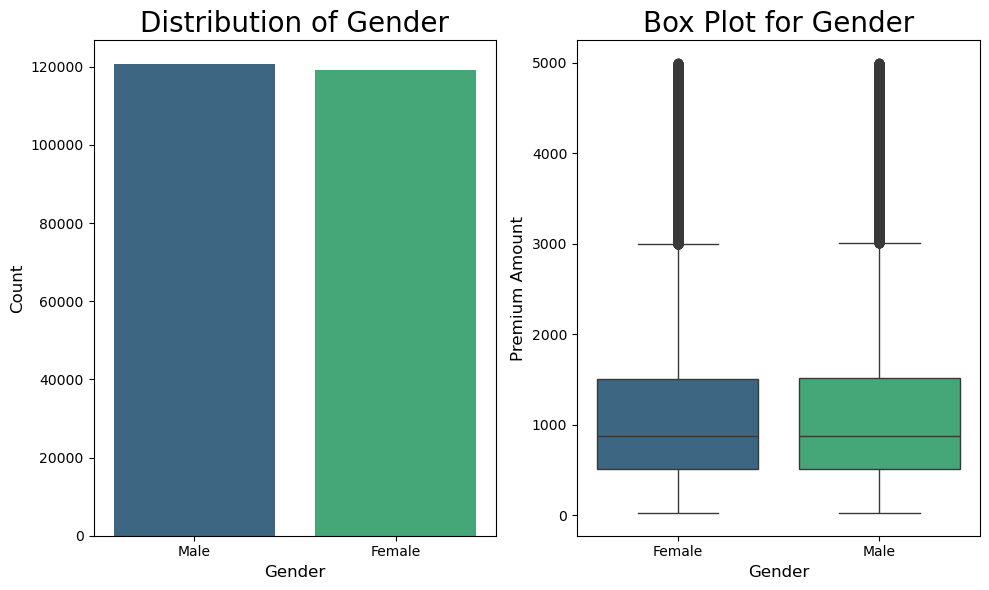

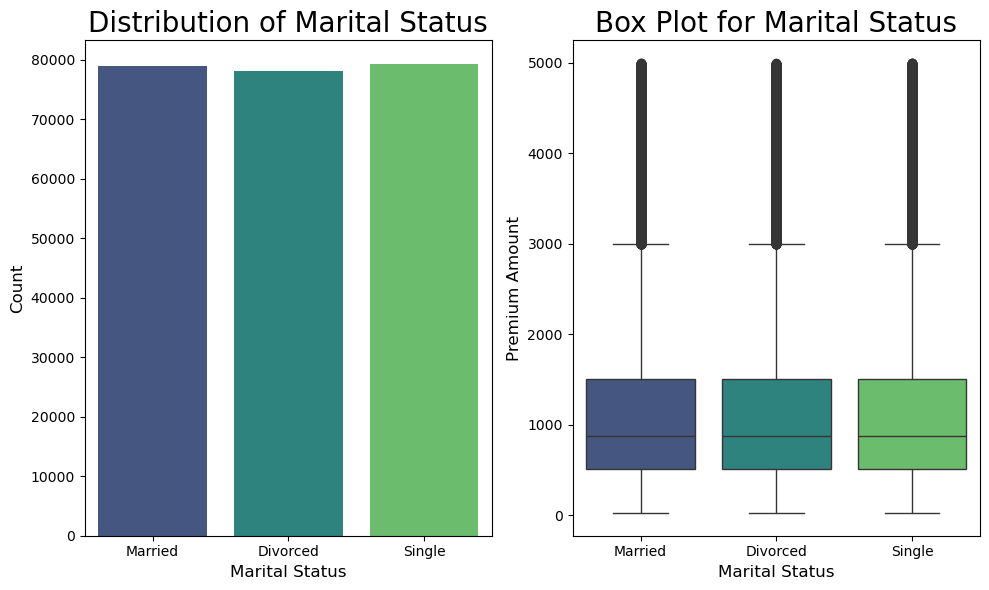

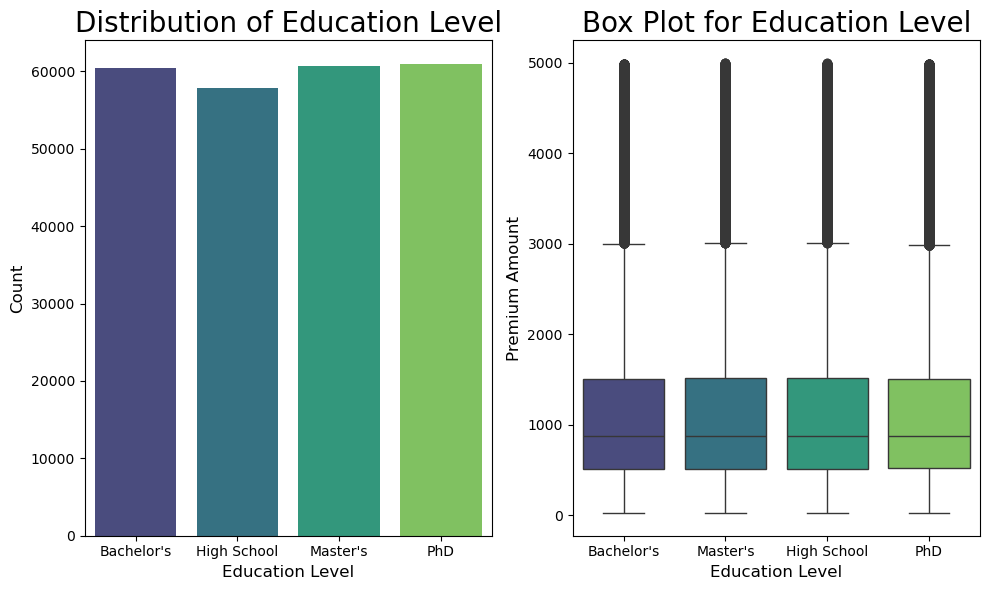

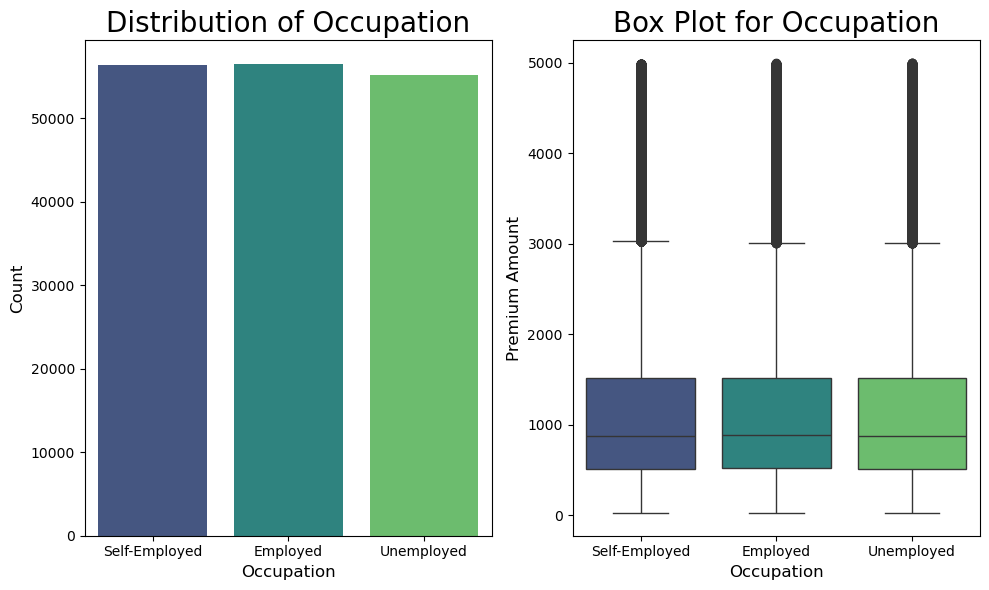

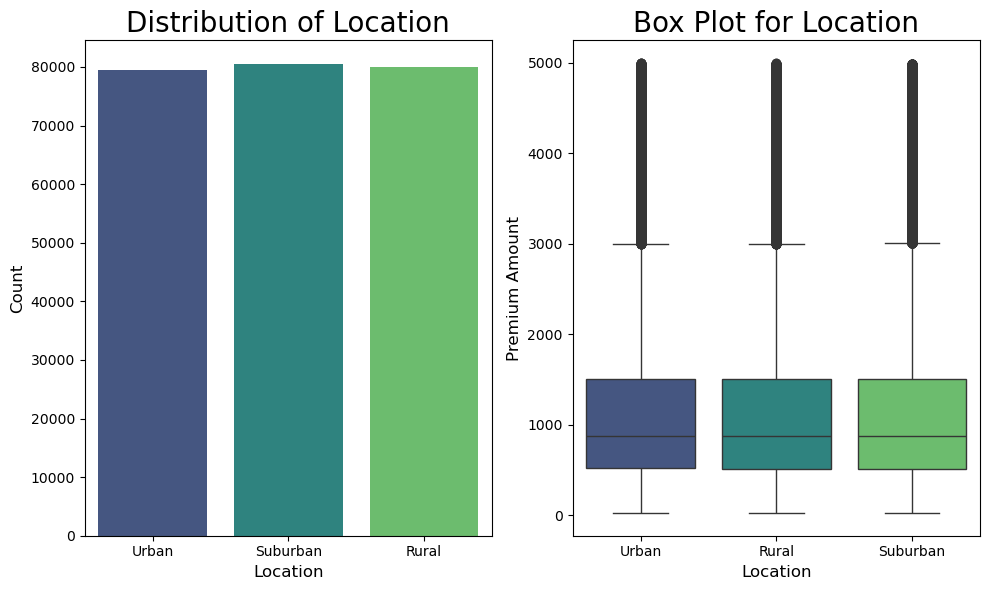

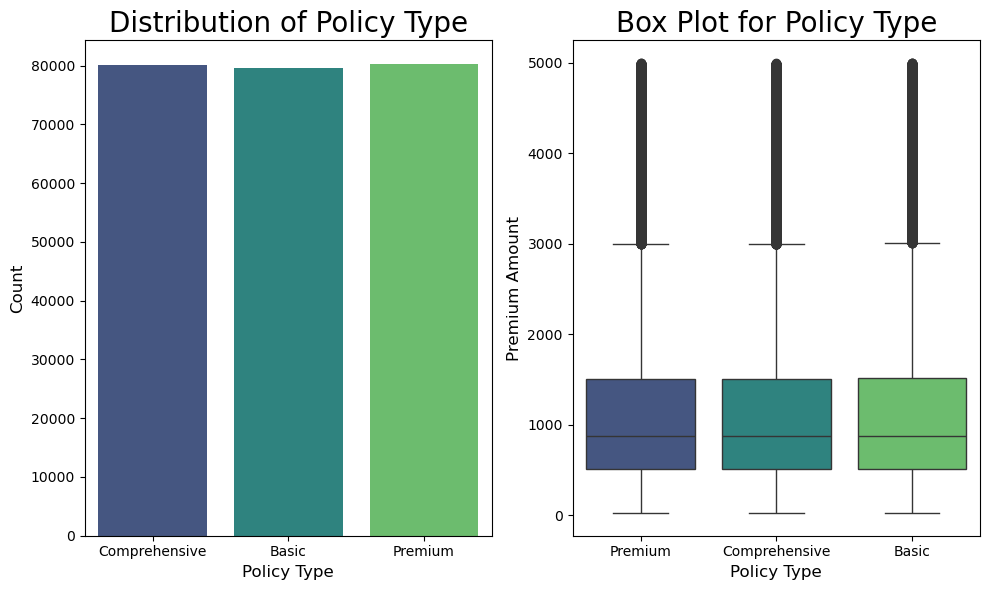

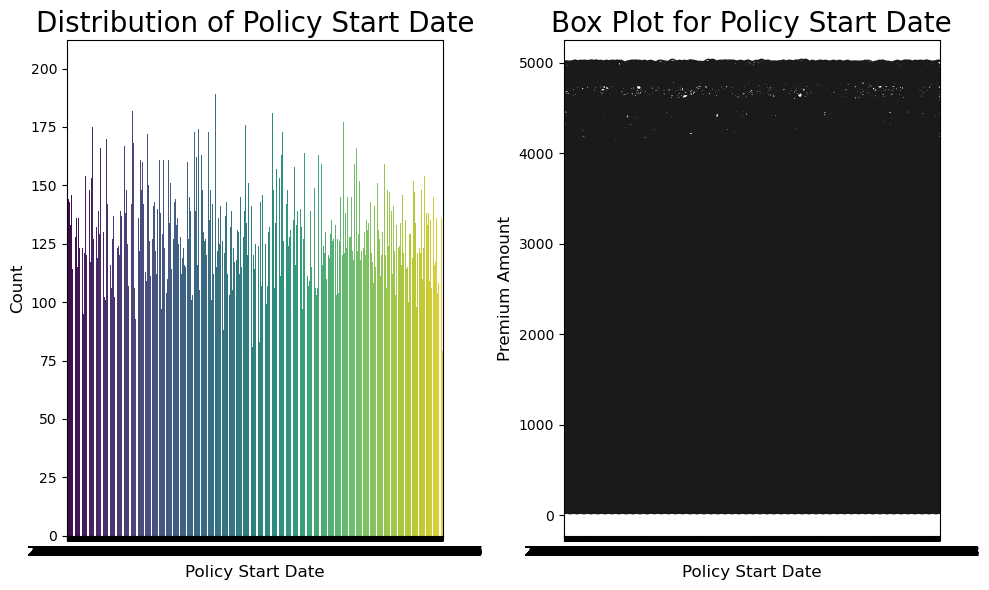

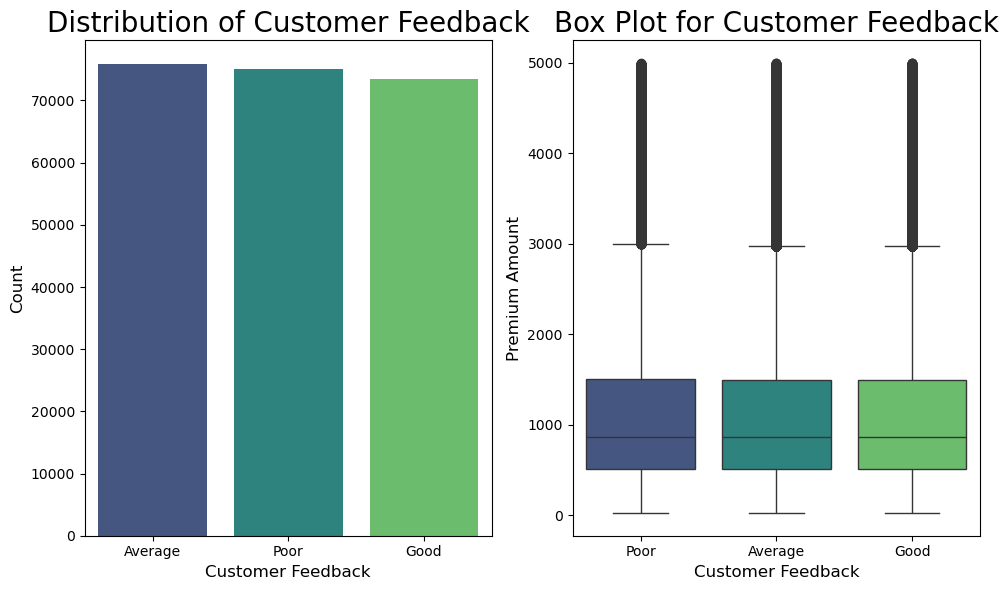

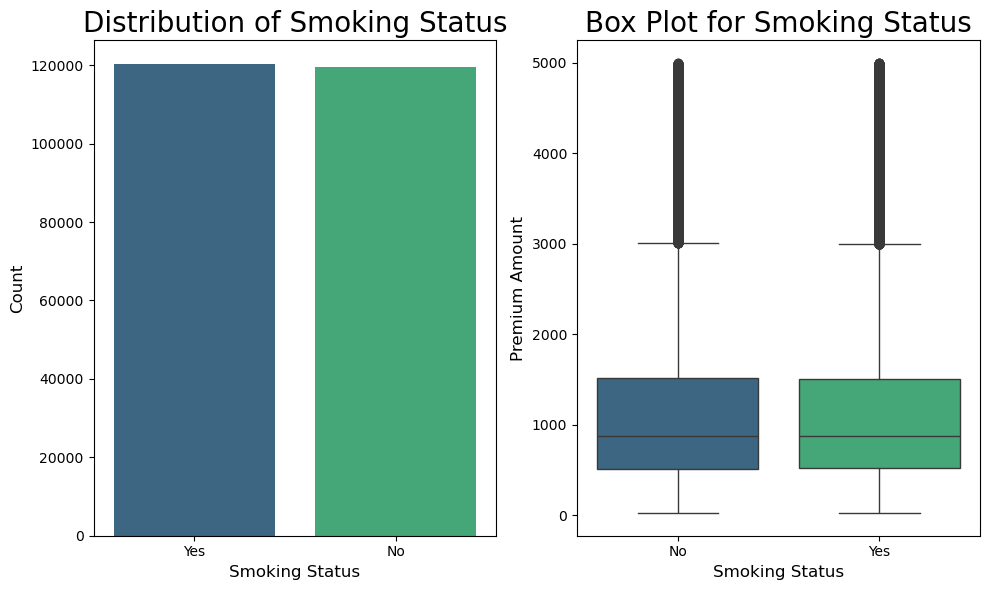

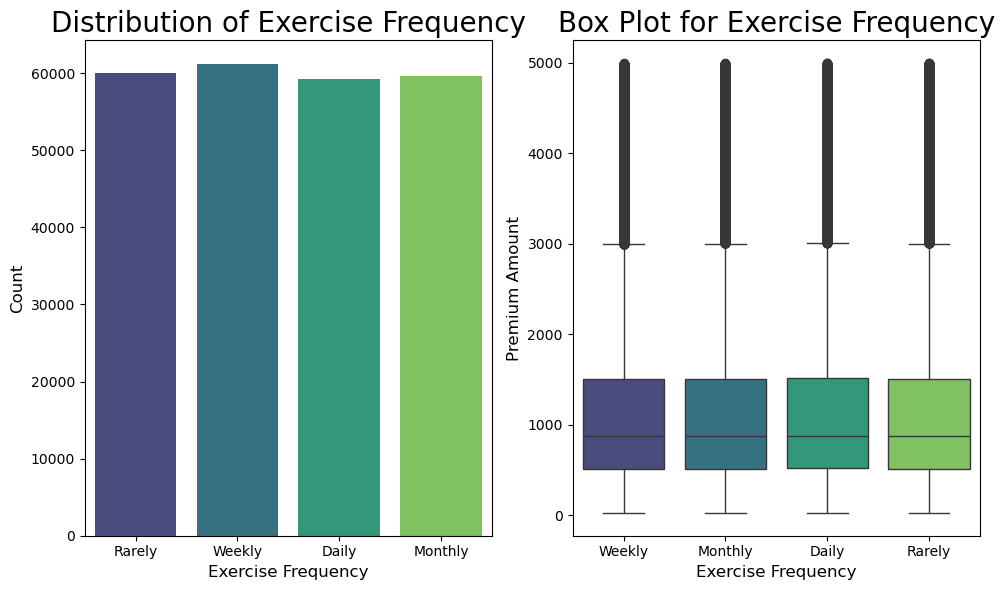

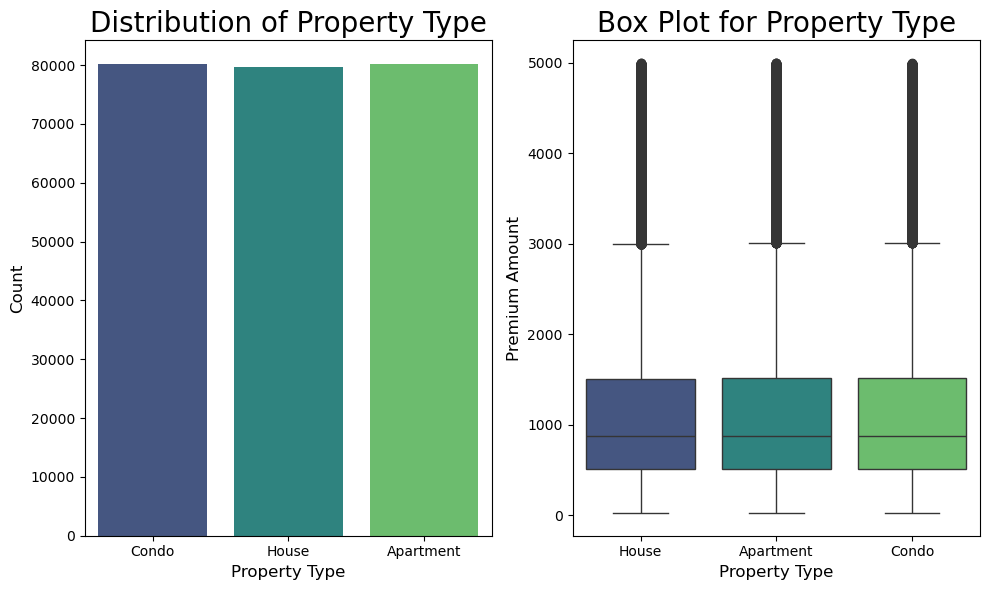

In [37]:
for i in cat_col:
    fig , axes = plt.subplots(1,2 , figsize=(10,6))
    sns.countplot(data=sample_data, x=i, palette='viridis', ax= axes[0])
    axes[0].set_title(f'Distribution of {i}', fontsize=20)
    axes[0].set_xlabel(i, fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    # BoxPlot
    sns.boxplot(data , x=i , y=tar_col ,palette= 'viridis', ax= axes[1])
    axes[1].set_title(f"Box Plot for {i}" , fontsize = 20)
    axes[1].set_xlabel(i,fontsize=12)
    axes[1].set_ylabel(tar_col,fontsize=12)
    plt.tight_layout()
    plt.show()

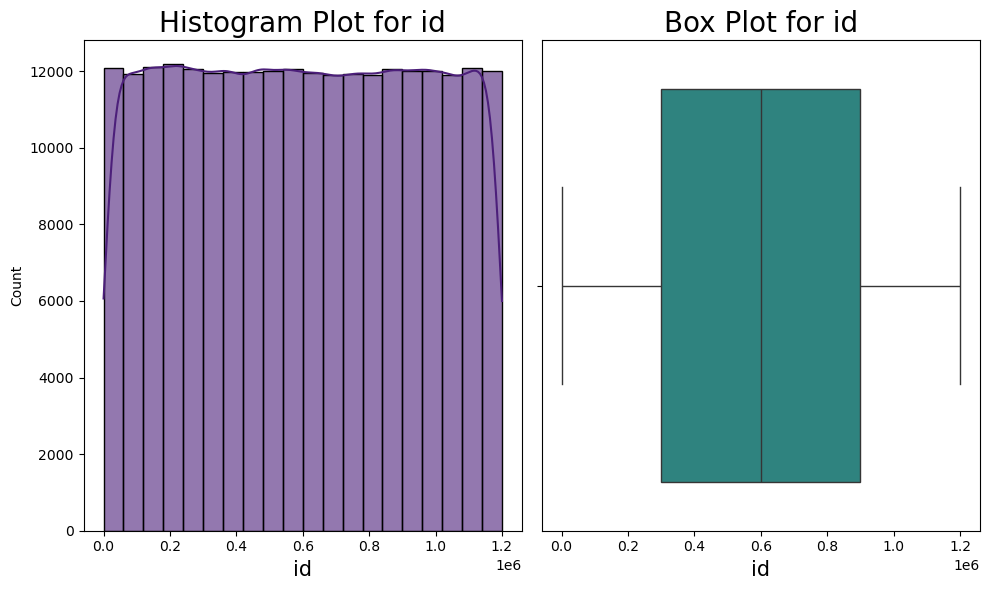

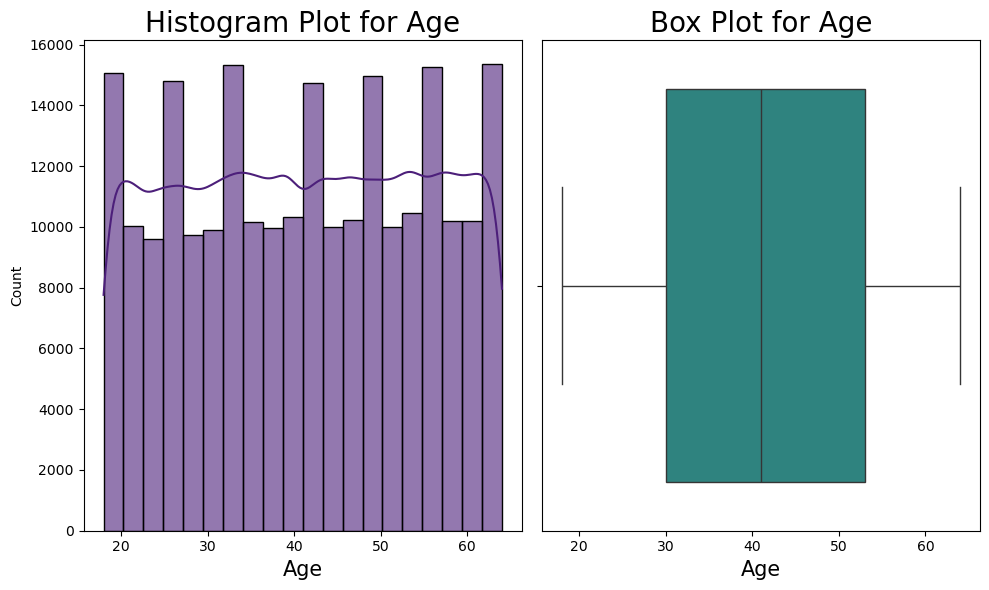

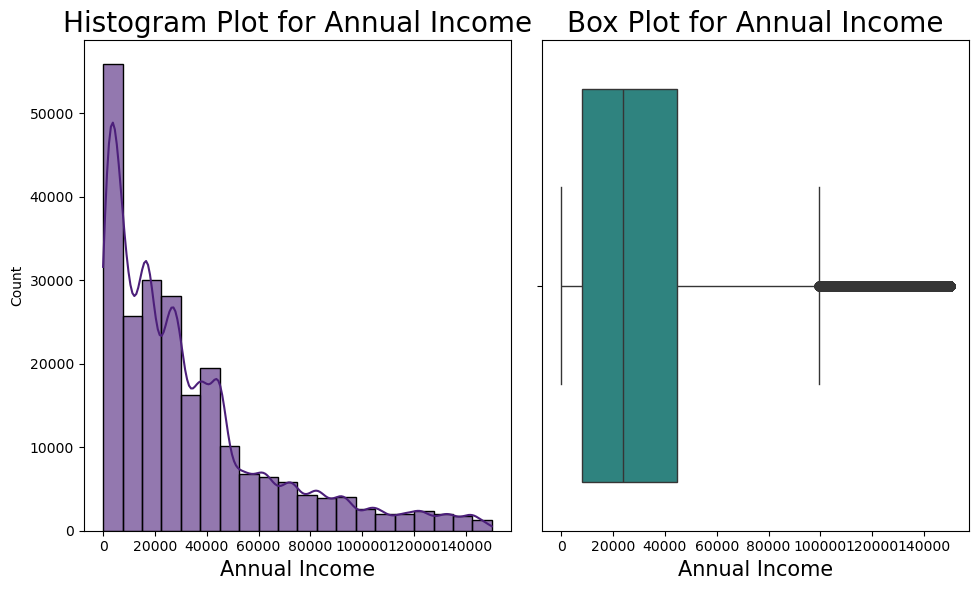

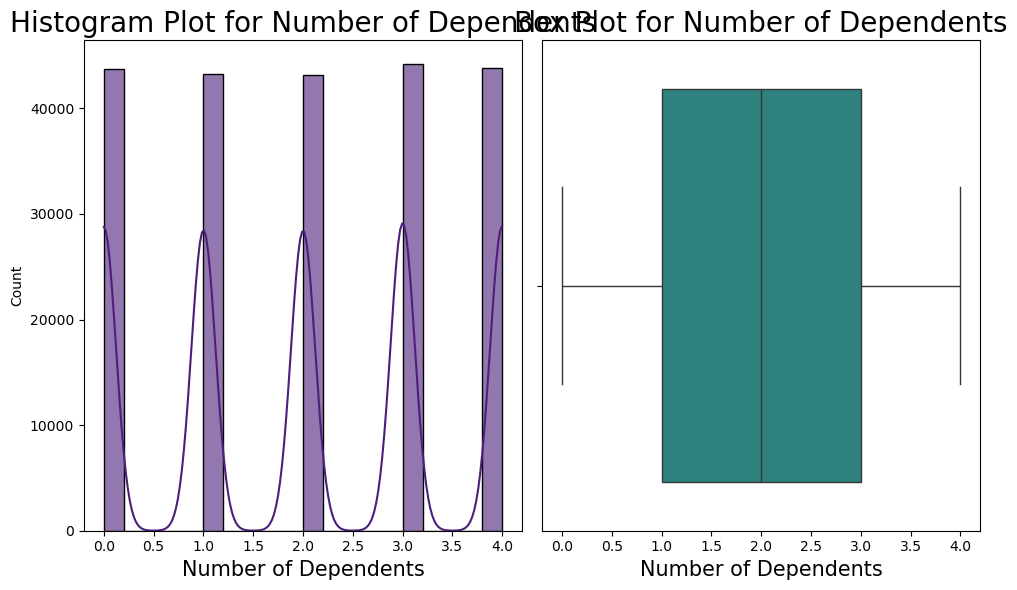

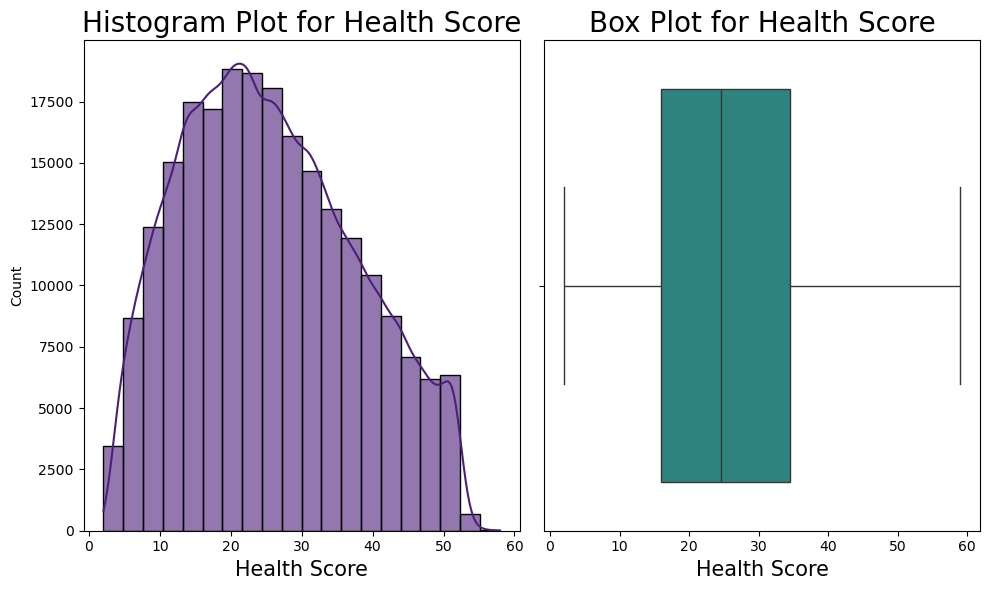

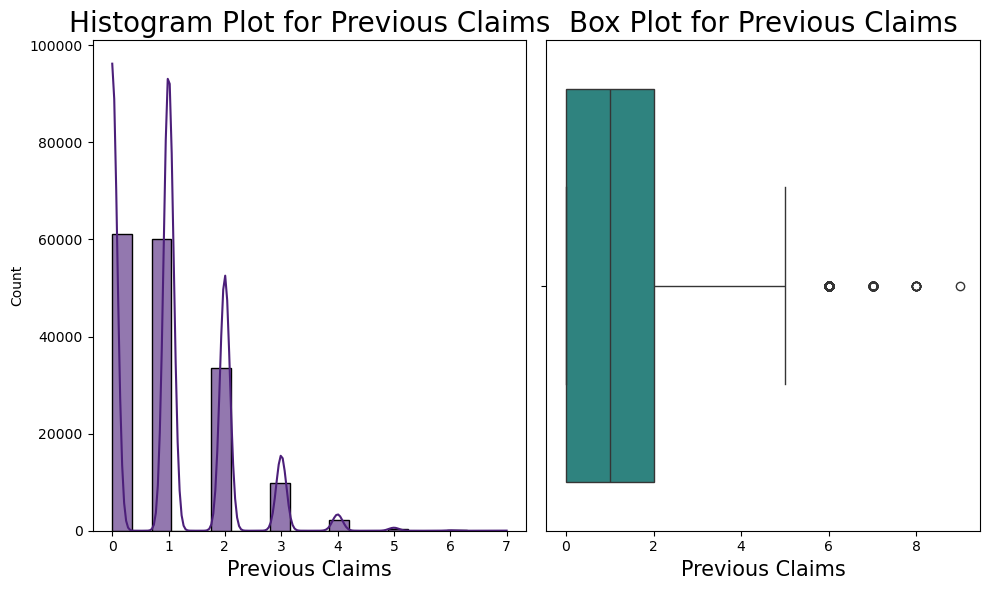

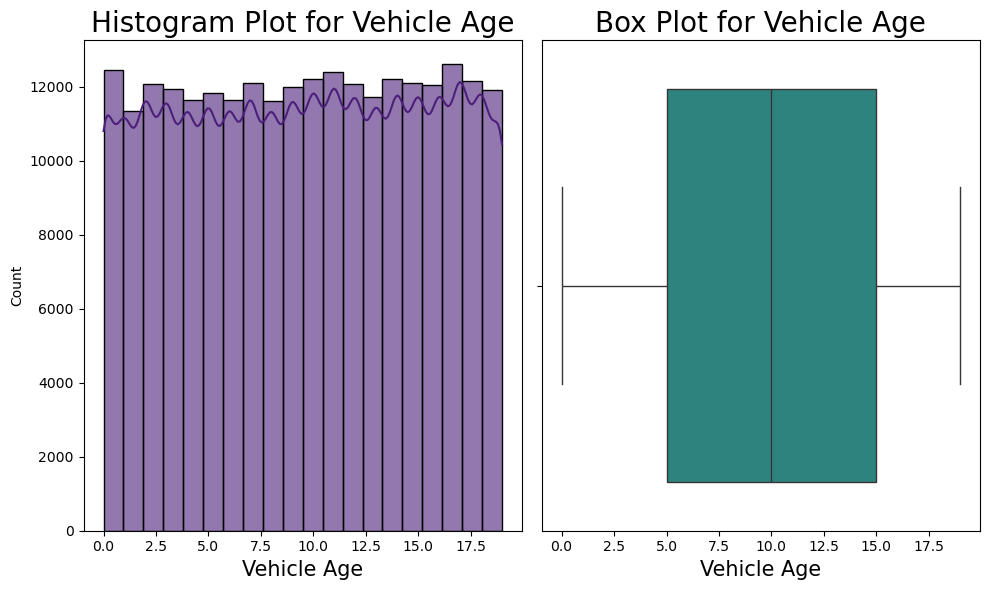

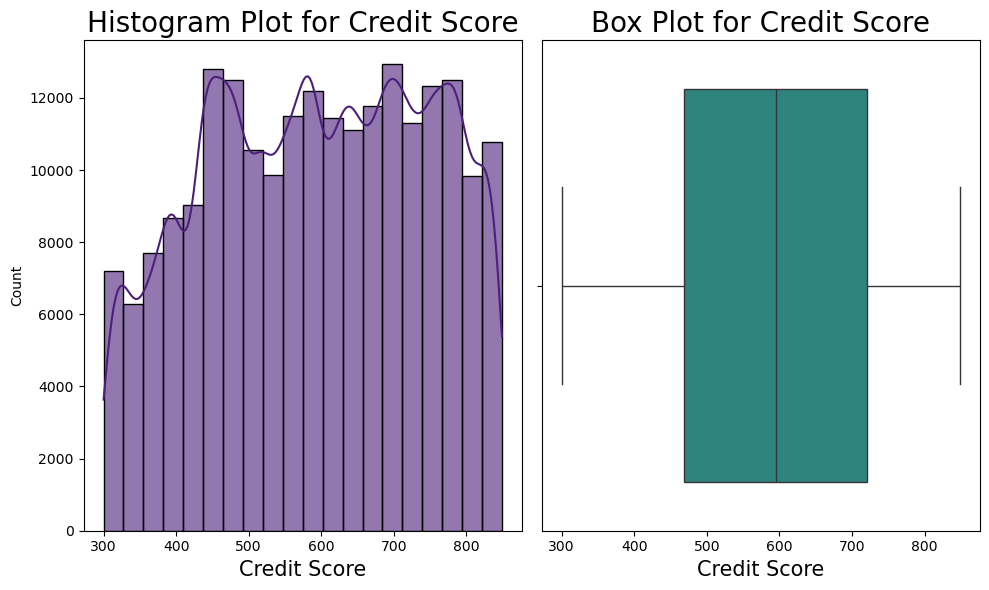

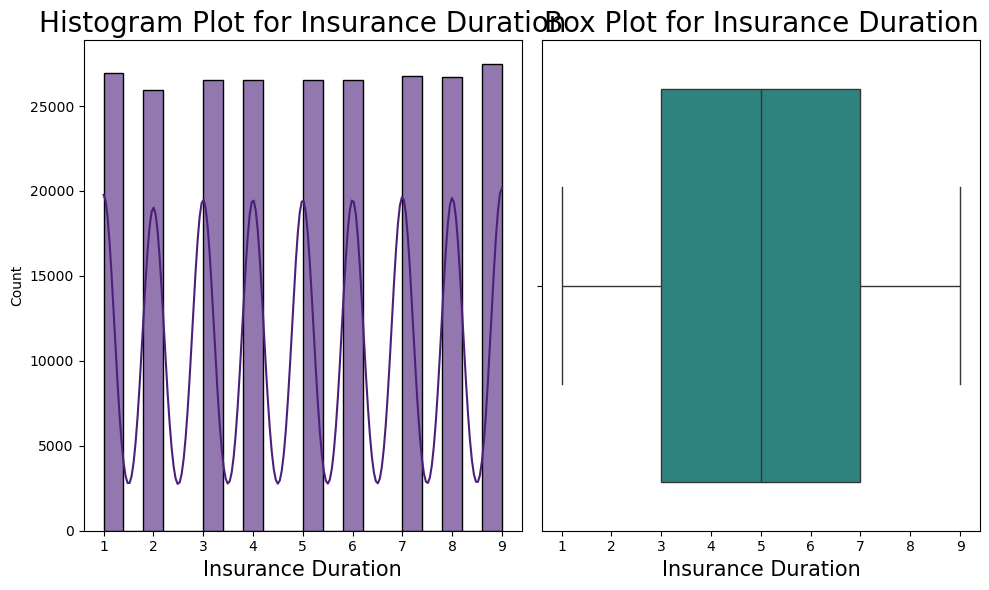

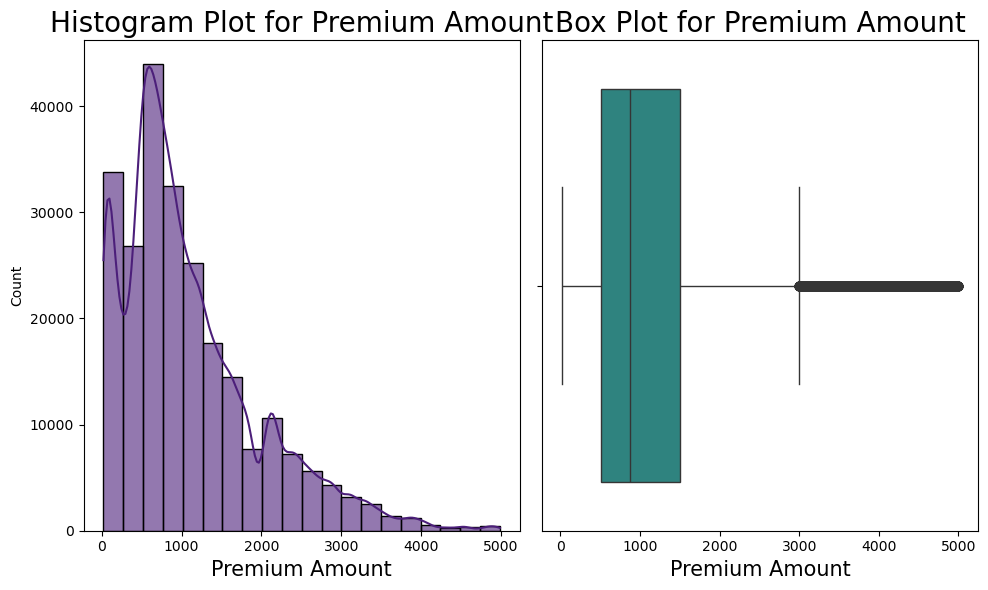

In [38]:
for i in num_col:
    fig , axes = plt.subplots(1,2 ,figsize= (10,6))
    # HistPlot
    sns.histplot(sample_data , x=i ,bins= 20,kde=True ,color ='#4C1F7A' ,edgecolor = 'black', alpha =0.6 ,ax= axes[0])
    axes[0].set_title(f"Histogram Plot for {i}" , fontsize = 20)
    axes[0].set_xlabel(i , fontsize=15)
    # BoxPlot
    sns.boxplot(data , x=i ,palette= 'viridis', ax = axes[1])
    axes[1].set_title(f"Box Plot for {i}" , fontsize = 20)
    axes[1].set_xlabel(i , fontsize=15)
    plt.tight_layout()
    plt.show()
    

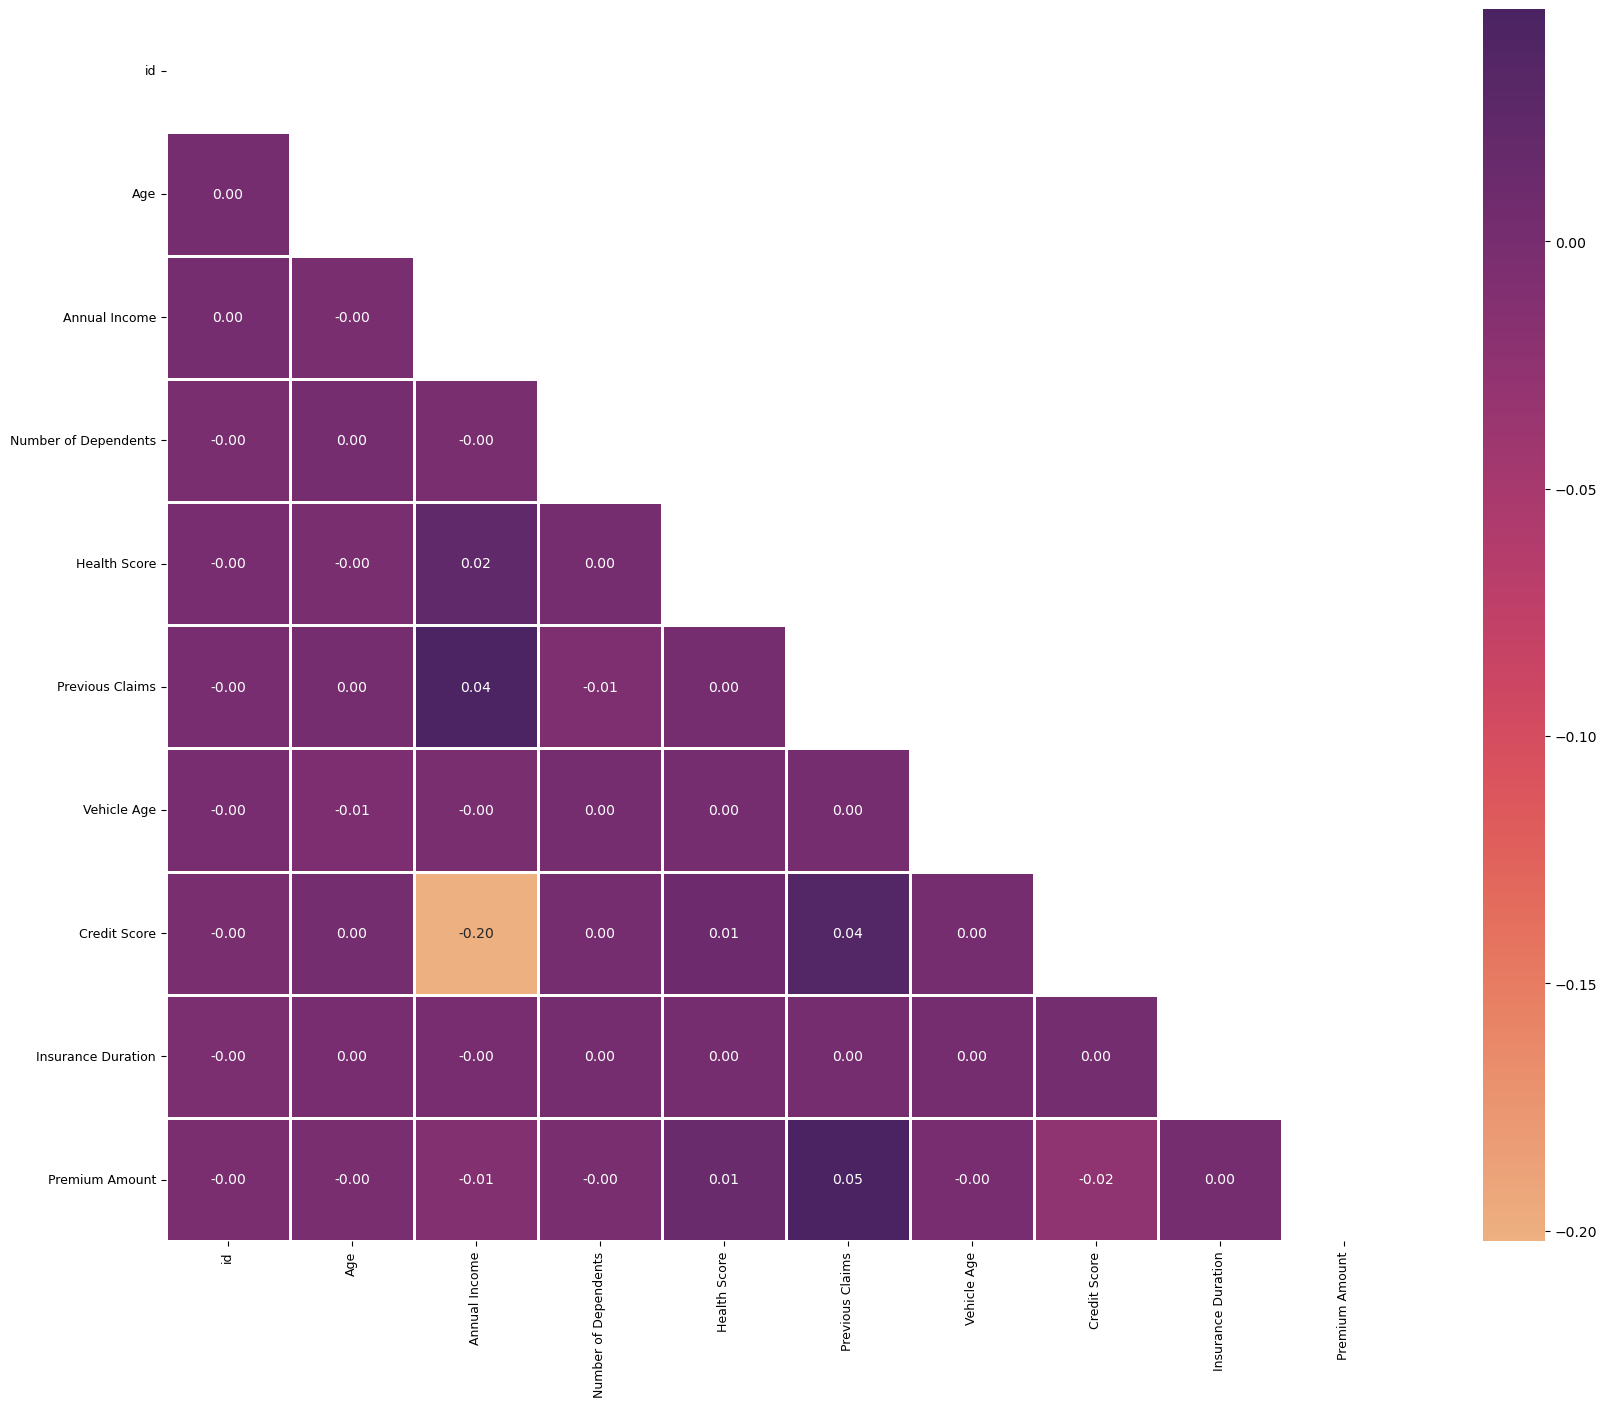

In [39]:
corr_mat = sample_data[num_col].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize = (20,16))
sns.heatmap(sample_data[num_col].corr(),
            mask=mask,
            annot = True ,   fmt ='.2f',
            linewidth=1    ,cmap = 'flare'
           )
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

In [47]:
def date_trans(df):
    df['Policy Start Date']= pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df.drop('Policy Start Date' , axis =1, inplace = True)
    return df

In [42]:
data.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Year', 'Day', 'Month'],
      dtype='object')

In [43]:
train_data = date_trans(data)
test_data = date_trans(test)

KeyError: 'Policy Start Date'

In [49]:
X = train_data.drop(columns=[tar_col, 'id' , 'Year', 'Month', 'Day'])
y = train_data[tar_col]

In [63]:
num_data = train_data.select_dtypes(include = ['number'])
cat_data = train_data.select_dtypes(include = ['object'])

In [73]:
num_col

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')

In [75]:
cat_col

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [79]:
num_col = num_col.drop(['id','Premium Amount'])

KeyError: "['id', 'Premium Amount'] not found in axis"

In [81]:
cat_col = cat_col.drop(['Policy Start Date'])

In [83]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # ('scaler', StandardScaler())                       # Scale numerical features
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # Encode categorical features
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),
        ('cat', cat_pipeline, cat_col)
    ]
)
X_processed = preprocessor.fit_transform(X)
test_transformed = preprocessor.transform(test_data.drop(columns=['id',  'Year', 'Month', 'Day']))

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [99]:
# 📌 Define evaluation function
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    
    # Root Mean Squared Logarithmic Error (RMSLE)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(y_pred)))

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_pred)

    # R² Score
    r2 = r2_score(y_val, y_pred)

    return {"RMSLE": rmsle, "RMSE": rmse, "MAE": mae, "R² Score": r2}



In [101]:
# 📌 Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# 📌 Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_val, y_val)

# 📌 Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T


Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...



Model Evaluation Results:
                       RMSLE        RMSE         MAE  R² Score
Linear Regression  1.168051  862.895550  666.893604  0.003609
Decision Tree      1.159343  852.458942  653.146903  0.027566
Random Forest      1.159160  852.255282  653.121941  0.028030
XGBoost            1.149939  845.828308  646.942441  0.042634


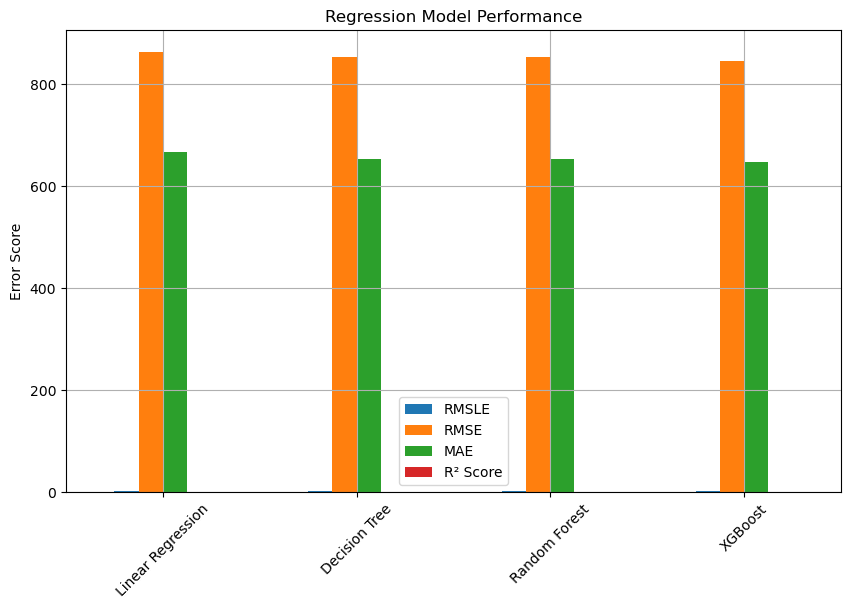

In [102]:
print("\nModel Evaluation Results:\n", results_df)

# 📊 Plot results
results_df.plot(kind="bar", figsize=(10,6), title="Regression Model Performance")
plt.ylabel("Error Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [105]:
xgb_model = xgb.XGBRegressor(eval_metric='rmsle', tree_method='hist')

In [107]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [109]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, error_score='raise')

In [111]:
best_parameter =  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

In [113]:
xgb_mb= XGBRegressor(**best_parameter) # Unpack the best_parameter dictionary
xgb_mb.fit(X_train ,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [119]:
y_val = np.nan_to_num(y_val)

In [121]:
y_pred = xgb_mb.predict(X_val)
rmsle= np.sqrt(mean_squared_log_error(y_val,y_pred))
print(f"RMSLE : {rmsle} " )

RMSLE : 1.1439114281299476 


In [123]:
output= pd.DataFrame(test_data['id'])
xgb_output = xgb_mb.predict(test_transformed)
output['Premium Amount']= xgb_output

In [125]:
output['Premium Amount']

0         1219.472412
1         1120.969971
2         1089.526733
3         1077.663696
4         1048.701050
             ...     
799995    1219.005127
799996    1433.432617
799997    1097.536377
799998    1177.505615
799999    1071.709229
Name: Premium Amount, Length: 800000, dtype: float32

In [133]:
# XGBoost Predictions on Validation Set
y_pred = xgb_mb.predict(X_val)

# Compute Evaluation Metrics
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))  # RMSLE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))        # RMSE
mae = mean_absolute_error(y_val, y_pred)                 # MAE
r2 = r2_score(y_val, y_pred)                             # R² Score

# Print results
print(" **XGBoost Model Evaluation on Validation Data**")
print(f" **RMSLE**: {rmsle:.4f}")
print(f" **RMSE**: {rmse:.4f}")
print(f" **MAE**: {mae:.4f}")
print(f" **R² Score**: {r2:.4f}")

# Predictions on Test Data
xgb_output = xgb_mb.predict(test_transformed)

# Store Predictions in DataFrame
output = pd.DataFrame({'id': test_data['id'], 'Premium Amount': xgb_output})

 **XGBoost Model Evaluation on Validation Data**
 **RMSLE**: 1.1439
 **RMSE**: 840.4895
 **MAE**: 638.5116
 **R² Score**: 0.0547


In [179]:
def mlflow_train_and_evaluate(model, model_name, X_train, X_val, y_train, y_val, test_transformed, test_data, feature_names, experiment_name="insurance_premium_prediction"):
    """Automated ML pipeline for training & evaluating a model with MLflow tracking."""
    
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run():
        # 1️⃣ Set Model Name in MLflow
        mlflow.set_tag("model_name", model_name)

        # 2️⃣ Log Dataset Information
        mlflow.log_param("dataset_total_size", len(X_train) + len(X_val))
        mlflow.log_param("train_size", len(X_train))
        mlflow.log_param("val_size", len(X_val))
        mlflow.log_param("feature_count", X_train.shape[1])

        # 3️⃣ Log Feature Names as a Single String
        mlflow.log_param("feature_names", ", ".join(feature_names))  # ✅ FIXED

        # 4️⃣ Train Model
        model.fit(X_train, y_train)

        # 5️⃣ Predictions & Evaluation
        y_pred = model.predict(X_val)
        rmsle = np.sqrt(mean_squared_log_error(y_val, np.clip(y_pred, 0, None)))  # Prevent negative values
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # 6️⃣ Log Model Hyperparameters (if available)
        if hasattr(model, "get_params"):
            mlflow.log_params(model.get_params())

        # 7️⃣ Log Metrics in MLflow
        mlflow.log_metric("RMSLE", rmsle)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2 Score", r2)

        # # 8️⃣ Convert X_val.iloc[0] to DataFrame with Correct Feature Names
        # input_example = pd.DataFrame([X_val.iloc[0]], columns=feature_names)  # ✅ FIXED

        # 9️⃣ Log Model with Input Signature & Name
        mlflow.sklearn.log_model(model, artifact_path=model_name)

        # 🔟 Print Evaluation Results
        print(f" **{model_name} Model Evaluation on Validation Data**")
        print(f" **RMSLE**: {rmsle:.4f}")
        print(f" **RMSE**: {rmse:.4f}")
        print(f" **MAE**: {mae:.4f}")
        print(f" **R² Score**: {r2:.4f}")

        # 🔟 Generate Predictions for Test Data
        test_predictions = model.predict(test_transformed)

        # Store Predictions in DataFrame
        output = pd.DataFrame({'id': test_data['id'], 'Premium Amount': test_predictions}) 

        print(f"✅ {model_name} Model and predictions saved in MLflow!")

    return model, output

In [181]:
# Define Feature Names
feature_names = ['Age', 'Annual Income', 'Credit Score', 'Vehicle Age', 'Health Score', 
                 'Number of Dependents', 'Previous Claims', 'Insurance Duration']

# Train & Log Multiple Models with MLflow
models = {
    "XGBoost": XGBRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression()
}

for model_name, model in models.items():
    mlflow_train_and_evaluate(model, model_name, X_train, X_val, y_train, y_val, test_transformed, test_data, feature_names)


2025/03/29 20:21:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **XGBoost Model Evaluation on Validation Data**
 **RMSLE**: 1.1431
 **RMSE**: 842.1146
 **MAE**: 638.9149
 **R² Score**: 0.0510
✅ XGBoost Model and predictions saved in MLflow!


2025/03/29 20:21:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **DecisionTree Model Evaluation on Validation Data**
 **RMSLE**: 1.5192
 **RMSE**: 1232.0305
 **MAE**: 892.7490
 **R² Score**: -1.0312
✅ DecisionTree Model and predictions saved in MLflow!


2025/03/29 20:42:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **RandomForest Model Evaluation on Validation Data**
 **RMSLE**: 1.1582
 **RMSE**: 849.2068
 **MAE**: 651.3872
 **R² Score**: 0.0350
✅ RandomForest Model and predictions saved in MLflow!


2025/03/29 20:43:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 **LinearRegression Model Evaluation on Validation Data**
 **RMSLE**: 1.1681
 **RMSE**: 862.8955
 **MAE**: 666.8936
 **R² Score**: 0.0036
✅ LinearRegression Model and predictions saved in MLflow!


In [167]:
# Define models to train
models = {
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=40, max_depth=5, random_state=42),
    "Linear Regression": LinearRegression()
}

# Train & Evaluate all models
trained_models = {}
test_predictions_dict = {}

for model_name, model in models.items():
    trained_model, test_predictions = mlflow_train_and_evaluate(
        model, model_name, X_train, X_val, y_train, y_val, test_transformed, test_data
    )
    trained_models[model_name] = trained_model
    test_predictions_dict[model_name] = test_predictions

NameError: name 'feature_names' is not defined